# After Seattle Surge's poor performance across the major 2 qualifiers, I've decided to look into the possible reasons why they struggled and identify key areas


#### Firstly, I will import the necessary packages

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from analysis_utils import filter_teams_games, all_modes_agg

#### Next, I will load in the games played and combine them into major1 and major2 datasets

In [132]:
# Read in all datasets
m1w1 = pd.read_csv('../data/major1_week1_short.csv')
m1w2 = pd.read_csv('../data/major1_week2_short.csv')
m2w1 = pd.read_csv('../data/major2_week1_short.csv')
m2w2 = pd.read_csv('../data/major2_week2_short.csv')
m2w3 = pd.read_csv('../data/major2_week3_short.csv')

# Combine datasets so there is 1 for each major
major1_df = pd.concat([m1w1, m1w2])
major2_df = pd.concat([m2w1, m2w2, m2w3])

# Filter to only games playes by seattle
sea_m1 = filter_teams_games(major1_df, 'Seattle Surge', False).drop(axis=1, columns='index')
sea_m2 = filter_teams_games(major2_df, 'Seattle Surge', False).drop(axis=1, columns='index')

for col in ['kd', 'kills', 'deaths', 'kd']:
    sea_m2[col] = sea_m2[col].astype('float')

#### Next, I will split each dataframe into different gamemodes

In [133]:
sea_m1_hp = sea_m1[sea_m1['mode']=='Hardpoint'].dropna(axis=1).reset_index()
sea_m1_snd = sea_m1[sea_m1['mode']=='SearchandDestroy'].dropna(axis=1).reset_index()
sea_m1_ctrl = sea_m1[sea_m1['mode']=='Control'].dropna(axis=1).reset_index()

sea_m2_hp = sea_m2[sea_m2['mode']=='Hardpoint'].dropna(axis=1).reset_index()
sea_m2_snd = sea_m2[sea_m2['mode']=='SearchandDestroy'].dropna(axis=1).reset_index()
sea_m2_ctrl = sea_m2[sea_m2['mode']=='Control'].dropna(axis=1).reset_index()

Next, I will look to compare stats from major 1 and major 2 in two separate modes, using my custom made function in the analysis_utils.py file 

In [134]:
m1_snd = all_modes_agg(sea_m1_snd, 'snd').reset_index()
m2_snd = all_modes_agg(sea_m2_snd, 'snd').reset_index()

m2_snd

/Users/charliebrowning/parcel-tracker/CDL-Stats/CDL-Stats/analysis/analysis_utils.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['player'] = dataframe['player']


,player,index,kills,deaths,kd,team_score,gametime,first_kill,first_death,plant,defuse,kills per 10,deaths per 10,engagements per 10,first_kill_effectiveness
0,Accuracy,891,25.0,54.0,0.462963,23,63,5.0,6.0,0.0,0.0,3.968254,8.571429,12.539683,0.833333
1,Mack,898,44.0,49.0,0.897959,23,63,6.0,14.0,11.0,4.0,6.984127,7.777778,14.761905,0.428571
2,Pred,905,53.0,50.0,1.060000,23,63,11.0,10.0,1.0,3.0,8.412698,7.936508,16.349206,1.100000
3,Sib,884,28.0,54.0,0.518519,23,63,4.0,9.0,0.0,1.0,4.444444,8.571429,13.015873,0.444444


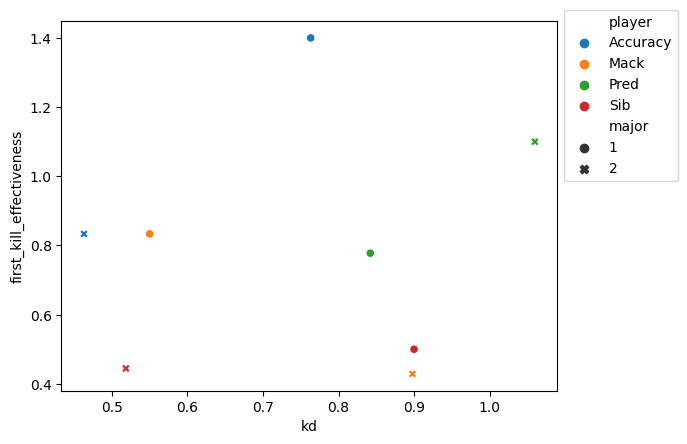

In [135]:

m1_snd["major"] = [1 for i in range(len(m1_snd['kills']))]
m2_snd["major"] = [2 for i in range(len(m2_snd['kills']))]
combined_snd = pd.concat([m1_snd, m2_snd])



sns.scatterplot(data=combined_snd, x='kd', y='first_kill_effectiveness', hue='player', style='major');
plt.legend(bbox_to_anchor=(1, 1.05));

#### Now that I have proof of concept, and know that these stats are informative, I can continue to create an analysis of all three gamemodes
Some things I learnt from the snd data the failure for all players but one (pred) to obtain > a 1 kd throughout both majors.
Overall, pred's snd performance improved between both majors.

/Users/charliebrowning/parcel-tracker/CDL-Stats/CDL-Stats/analysis/analysis_utils.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['player'] = dataframe['player']


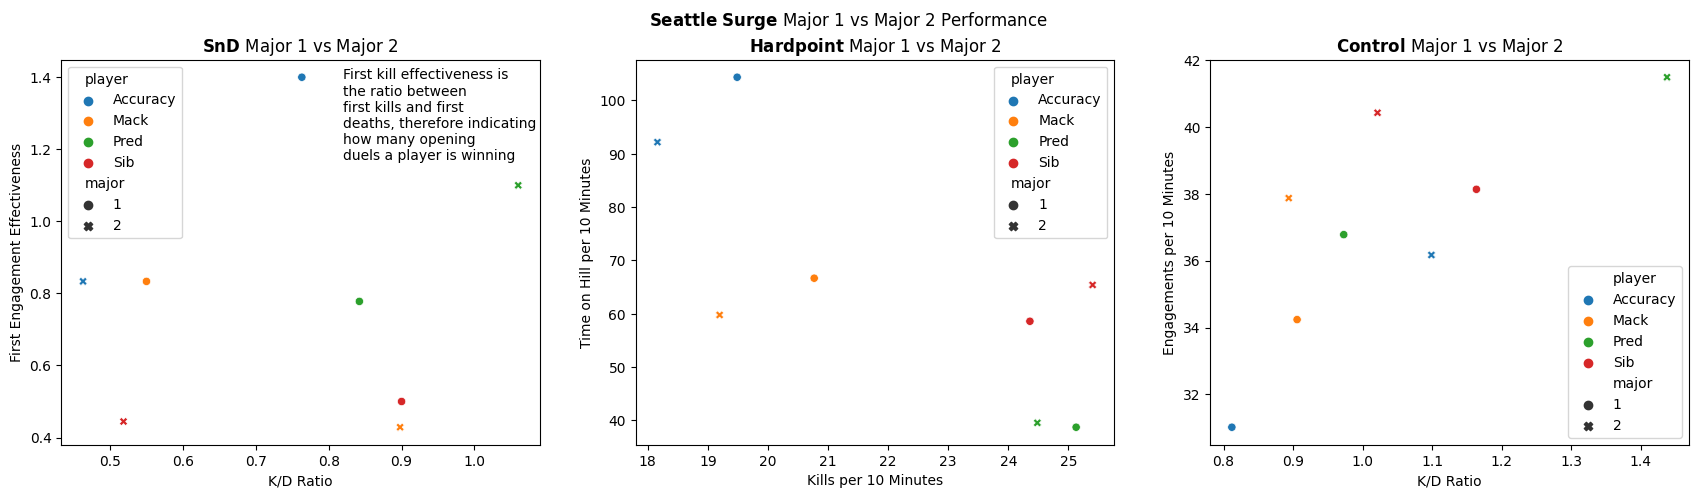

In [136]:
# SnD
m1_snd = all_modes_agg(sea_m1_snd, 'snd').reset_index()
m2_snd = all_modes_agg(sea_m2_snd, 'snd').reset_index()
m1_snd["major"] = [1 for i in range(len(m1_snd['kills']))]
m2_snd["major"] = [2 for i in range(len(m2_snd['kills']))]
combined_snd = pd.concat([m1_snd, m2_snd])

# Hardpoint
m1_hp = all_modes_agg(sea_m1_hp, 'hardpoint').reset_index()
m2_hp = all_modes_agg(sea_m2_hp, 'hardpoint').reset_index()
m1_hp["major"] = [1 for i in range(len(m1_hp['kills']))]
m2_hp["major"] = [2 for i in range(len(m2_hp['kills']))]
combined_hp = pd.concat([m1_hp, m2_hp])

# Control
m1_ctrl = all_modes_agg(sea_m1_ctrl, 'control').reset_index()
m2_ctrl = all_modes_agg(sea_m2_ctrl, 'control').reset_index()
m1_ctrl["major"] = [1 for i in range(len(m1_ctrl['kills']))]
m2_ctrl["major"] = [2 for i in range(len(m2_ctrl['kills']))]
combined_ctrl = pd.concat([m1_ctrl, m2_ctrl])

# Create plot
fig = plt.figure(figsize=(21, 5))
(ax1, ax2, ax3) = fig.subplots(ncols=3)

sns.scatterplot(data=combined_snd, x='kd', y='first_kill_effectiveness', hue='player', style='major', ax=ax1);
ax1.set_xlabel("K/D Ratio")
ax1.set_ylabel("First Engagement Effectiveness")
ax1.set_title(r"$\bf{SnD}$ Major 1 vs Major 2")
fke = "First kill effectiveness is\nthe ratio between\nfirst kills and first\ndeaths, therefore indicating\nhow many opening \nduels a player is winning"
ax1.text(x=0.82, y=1.17, s=fke)

sns.scatterplot(data=combined_hp, x='kills per 10', y='hill_time_per_10', hue='player', style='major', ax=ax2)
ax2.set_title(r"$\bf{Hardpoint}$ Major 1 vs Major 2")
ax2.set_xlabel("Kills per 10 Minutes")
ax2.set_ylabel("Time on Hill per 10 Minutes")

sns.scatterplot(data=combined_ctrl, y='engagements per 10', x='kd', hue='player', style='major', ax=ax3)
ax3.set_title(r"$\bf{Control}$ Major 1 vs Major 2")
ax3.set_ylabel("Engagements per 10 Minutes")
ax3.set_xlabel("K/D Ratio")

plt.suptitle(r"$\bf{Seattle}$ $\bf{Surge}$ Major 1 vs Major 2 Performance")
plt.legend()